# Introduction
This dataset consists of information about 161 cellphone products, covering various attributes related to their specifications and sales. It includes 14 columns such as "Product_id," "Price," "Sale," "weight," "resolution," "ppi," "cpu core," "cpu freq," "internal memory," "ram," "RearCam," "Front_Cam," "battery," and "thickness." Each row represents a unique cellphone product with details about its features and sales data. This dataset can be useful for analyzing market trends, comparing product specifications, and studying factors influencing cellphone sales

Import Libraries And Load Data

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score


df = pd.read_csv("C:\datascience\dataset1/Cellphone.csv")
print(df.to_string())



     Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  internal mem    ram  RearCam  Front_Cam  battery  thickness
0           203   2357    10   135.0         5.20  424         8     1.350        16.000  3.000    13.00        8.0     2610        7.4
1           880   1749    10   125.0         4.00  233         2     1.300         4.000  1.000     3.15        0.0     1700        9.9
2            40   1916    10   110.0         4.70  312         4     1.200         8.000  1.500    13.00        5.0     2000        7.6
3            99   1315    11   118.5         4.00  233         2     1.300         4.000  0.512     3.15        0.0     1400       11.0
4           880   1749    11   125.0         4.00  233         2     1.300         4.000  1.000     3.15        0.0     1700        9.9
5           947   2137    12   150.0         5.50  401         4     2.300        16.000  2.000    16.00        8.0     2500        9.5
6           774   1238    13   134.1         4.0

Data Cleaning

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [49]:
df.isna().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [50]:
df.duplicated().sum()

0

 Drop useless columns

In [ ]:

df_cleaned = df.drop(columns=["Product_id", "Sale", "weight", "thickness"])


Extracting Independent And depent variable

In [52]:
x=df[["ram","ppi", "internal mem", "RearCam", "cpu freq", "cpu core", "Front_Cam", "battery", "resoloution"]]
x=pd.DataFrame(x)
y=df[["Price"]]
y=pd.DataFrame(y)

Finding Correlation of the data

In [53]:
cor=df[["ram","ppi", "internal mem", "RearCam", "cpu freq", "cpu core", "Front_Cam", "battery", "resoloution","Price"]].corr()
print(cor)


                   ram       ppi  internal mem   RearCam  cpu freq  cpu core  \
ram           1.000000  0.748724      0.875354  0.648073  0.633547  0.483128   
ppi           0.748724  1.000000      0.618560  0.774008  0.713168  0.487990   
internal mem  0.875354  0.618560      1.000000  0.451917  0.441400  0.276251   
RearCam       0.648073  0.774008      0.451917  1.000000  0.625104  0.611353   
cpu freq      0.633547  0.713168      0.441400  0.625104  1.000000  0.491519   
cpu core      0.483128  0.487990      0.276251  0.611353  0.491519  1.000000   
Front_Cam     0.647470  0.491371      0.555733  0.596374  0.358319  0.586698   
battery       0.541001  0.302517      0.461506  0.287821  0.473137  0.459728   
resoloution   0.327216  0.181292      0.202660  0.249892  0.505454  0.472226   
Price         0.896915  0.817614      0.776738  0.739538  0.727383  0.686811   

              Front_Cam   battery  resoloution     Price  
ram            0.647470  0.541001     0.327216  0.896915  
p

Data Visualization

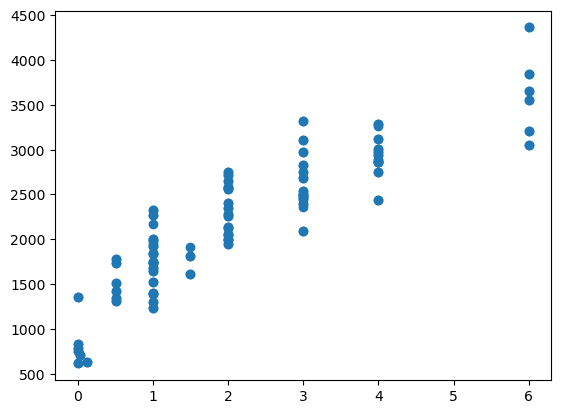

In [54]:
plt.scatter(df['ram'],df['Price'])
plt.show()

Split the data into train and test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Model Building And Evaluate Prediction

In [56]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

 Predict on test data

In [ ]:

y_pred=model.predict(x_test)
print(y_pred)
print(y_test)


[[ 823.8749688 ]
 [1777.29211724]
 [2503.88312064]
 [1513.0281623 ]
 [1571.61389853]
 [1624.5016218 ]
 [ 823.8749688 ]
 [1321.10199033]
 [2374.12291022]
 [2503.88312064]
 [1476.36259391]
 [1631.75918549]
 [1789.69405965]
 [2783.16936301]
 [2343.00165924]
 [2322.13245207]
 [2644.75982931]
 [3022.09021843]
 [1435.21373825]
 [2322.13245207]
 [2342.37592505]
 [1789.69405965]
 [1821.11339548]
 [2374.12291022]
 [3217.02075662]
 [4047.28673625]
 [2535.66027198]
 [3538.42092212]
 [2752.00702573]
 [2505.76494162]
 [3101.82611094]
 [2426.26821418]
 [2587.9286834 ]]
     Price
105    833
108   1676
142   2508
55    1777
94    1511
29    1950
101    833
51    1347
100   2343
143   2508
19    1238
84    1646
15    1612
66    2746
24    1942
30    2258
128   2491
148   3055
98    1522
16    2258
75    2276
18    1612
12    2174
9     2580
31    2977
152   4361
97    2562
56    3658
132   2466
104   2744
137   3116
78    2714
60    2824


Finding Accuracy And MSE Value Of Data 

In [58]:
mse_value=metrics.mean_squared_error(y_pred,y_test)
print(mse_value)
accurancy=metrics.r2_score(y_pred,y_test)
print(accurancy)

34359.27469188905
0.9337263338013436


# Summary
The cellphone dataset contains 161 entries, each detailing specifications and sales information for various cellphone models. Key attributes include pricing, sales volume, weight, resolution, CPU specifications, memory, camera quality, battery capacity, and thickness. This structured data allows for an in-depth analysis of how different features may influence sales performance. Overall, it provides valuable insights for market analysis, product comparison, and understanding consumer preferences in the cellphone industry.